# 13 Euler-Maclaurinの和公式

黒木玄

2018-07-04

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/13%20Euler-Maclaurin%20summation%20formula.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bernoulli多項式" data-toc-modified-id="Bernoulli多項式-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bernoulli多項式</a></span><ul class="toc-item"><li><span><a href="#Bernoulli多項式の定義" data-toc-modified-id="Bernoulli多項式の定義-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bernoulli多項式の定義</a></span></li><li><span><a href="#Bernoulli多項式の基本性質" data-toc-modified-id="Bernoulli多項式の基本性質-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bernoulli多項式の基本性質</a></span></li><li><span><a href="#べき乗和" data-toc-modified-id="べき乗和-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>べき乗和</a></span></li><li><span><a href="#Bernoulli数の計算法" data-toc-modified-id="Bernoulli数の計算法-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Bernoulli数の計算法</a></span></li></ul></li><li><span><a href="#Euler-Maclaurinの和公式" data-toc-modified-id="Euler-Maclaurinの和公式-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Euler-Maclaurinの和公式</a></span><ul class="toc-item"><li><span><a href="#Euler-Maclaurinの和公式の導出" data-toc-modified-id="Euler-Maclaurinの和公式の導出-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Euler-Maclaurinの和公式の導出</a></span></li><li><span><a href="#Euler-Maclaurinの和公式の2つの解釈" data-toc-modified-id="Euler-Maclaurinの和公式の2つの解釈-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Euler-Maclaurinの和公式の2つの解釈</a></span></li><li><span><a href="#Euler-Maclaurinの和公式の形式的導出" data-toc-modified-id="Euler-Maclaurinの和公式の形式的導出-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Euler-Maclaurinの和公式の形式的導出</a></span></li><li><span><a href="#べき乗和(再)" data-toc-modified-id="べき乗和(再)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>べき乗和(再)</a></span></li><li><span><a href="#Stirlingの近似公式" data-toc-modified-id="Stirlingの近似公式-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Stirlingの近似公式</a></span></li></ul></li><li><span><a href="#ゼータ函数への応用" data-toc-modified-id="ゼータ函数への応用-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ゼータ函数への応用</a></span><ul class="toc-item"><li><span><a href="#解析接続" data-toc-modified-id="解析接続-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>解析接続</a></span></li><li><span><a href="#ζ(2)の近似計算" data-toc-modified-id="ζ(2)の近似計算-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ζ(2)の近似計算</a></span></li><li><span><a href="#s-=-1でのζ(s)の定数項がEuler定数になること" data-toc-modified-id="s-=-1でのζ(s)の定数項がEuler定数になること-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>s = 1でのζ(s)の定数項がEuler定数になること</a></span></li><li><span><a href="#負の整数におけるゼータ函数の特殊値の計算" data-toc-modified-id="負の整数におけるゼータ函数の特殊値の計算-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>負の整数におけるゼータ函数の特殊値の計算</a></span></li><li><span><a href="#発散級数の有限部分と-ζ(-r)-の関係" data-toc-modified-id="発散級数の有限部分と-ζ(-r)-の関係-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>発散級数の有限部分と ζ(-r) の関係</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## Bernoulli多項式

### Bernoulli多項式の定義

**定義(Bernoulli多項式):** Bernoulli多項式** $B_n(x)$ ($n=0,1,2,\ldots$)を

$$
\frac{ze^{zx}}{e^z-1} = \sum_{n=0}^\infty \frac{B_n(x)}{n!}x^n
$$

によって定義する. $\QED$



### Bernoulli多項式の基本性質

**一般化Bernoulli多項式の基本性質:** Bernoulli多項式 $B_n(x)$ は以下の性質を満たしている:

(1) $B_0(x)=1$.

(2) $\ds\int_0^1 B_n(x)\,dx = \delta_{n,0}$.

(3) $\ds B_n(x+h) = \sum_{k=0}^n\binom{n}{k}B_{n-k}(x)h^k = 
\sum_{k=0}^n \binom{n}{k} B_k(x) h^{n-k}$.

(4) $B_n'(x)=nB_{n-1}(x)$.

(5) $\ds B_n(x+1)=B_n(x)+nx^{n-1}$.

(6) $B_n(1-x)=(-1)^n B_n(x)$.

(7) $B_n(1)=B_n(0)+\delta_{n,1}$ となる.

(8) $B_n(0)=1$, $\ds B_n(0)=-\frac{1}{2}$ とな, $n$ が3以上の奇数ならば $B_n(0)=0$ となる.

**証明:** (1) $e^{zx}=1+O(z)$, $\ds\frac{e^z-1}{z}=1+O(z)$ より, $\ds\frac{ze^{zx}}{e^z-1}=1+O(z)$ なので $B_0(x) = 1$.

(2)を示そう.

$$
\begin{aligned}
&
\int_0^1 \frac{ze^{zx}}{e^z-1}\,dx = \frac{z}{e^z-1}\int_0^1 e^{zx}\,dx = 
\frac{z}{e^z-1}\frac{e^z-1}{z} = 1, 
\\ &
\int_0^1\frac{ze^{zx}}{e^z-1}\,dx = \sum_{n=0}^\infty\frac{z^n}{n!}\int_0^1 B_n(x)\,dx
\end{aligned}
$$

なので, これらを比較して $\ds\int_0^1 B_n(x)\,dx = \delta_{n,0}$.

(3) 二項定理より,

$$
\int_0^1 (x+y)^n\,dy = 
\sum_{k=0}^n \binom{n}{k} x^{n-k} \int_0^1 y^k\,dy.
$$

ゆえに, $x$ の函数を $x$ の函数に移す線形写像(前方移動平均)

$$
f(x)\mapsto \int_0^1 f(x+y)\,dy
$$

は多項式を多項式に移し, 最高次の係数が1の多項式を最高次の係数が1の同次の多項式に移す. これより, 線形写像 $\ds f(x)\mapsto \int_0^1 f(x+y)\,dy$ は多項式どうしの一対一対応を与える線形写像になっていることがわかる. そして,

$$
\begin{aligned}
&
\int_0^1\frac{ze^{z(x+y)}}{e^z-1}\,dx = 
\sum_{n=0}^\infty\frac{\int_0^1 B_n(x+y)\,dy}{n!}z^n, 
\\ &
\int_0^1\frac{ze^{z(x+y)}}{e^z-1}\,dx = 
\frac{ze^{zx}}{e^z-1}\int_0^1 e^{zy}\,dy =
\frac{ze^{zx}}{e^z-1}\frac{e^z-1}{z} =
e^{zx} =
\sum_{n=0}^\infty \frac{x^n}{n!}z^n
\end{aligned}
$$

なので, これらを比較して,

$$
\int_0^1 B_n(x+y)\,dy = x^n
$$

が成立することがわかる. ゆえに, 

$$
\int_0^1 B_n(x+h+y)\,dy = (x+h)^n = \sum_{k=0}^n \binom{n}{k}x^{n-k}h^k =
\int_0^1 \sum_{k=0}^n \binom{n}{k}B_{n-k}(x+y)h^k \,dy
$$

より

$$
B_n(x+h) = \sum_{k=0}^n \binom{n}{k}B_{n-k}(x)h^k.
$$

(4) すぐ上の等式の右辺の $h$ の係数を見ることによって,

$$
B_n'(x) = n B_{n-1}(x).
$$

(5) Bernoulli多項式の母函数の $x$ に $x+1$ を代入すると,

$$
\frac{ze^{z(x+1)}}{e^z-1} = \frac{ze^z e^{zx}}{e^z-1} =
\frac{z(1+(e^z-1))e^{zx}}{e^z-1} = \frac{ze^{zx}}{e^z-1} + ze{zx}
$$

なので両辺を $z$ について展開して比較すれば(5)が得られる.

(6) Bernoulli多項式の母函数の $x$ に $1-x$ を代入すると,

$$
\frac{ze^{z(1-x)}}{e^z-1} = \frac{ze^z e^{-zx}}{e^z-1} =
\frac{ze^{-zx}}{1-e^{-z}} = \frac{-ze^{-zx}}{e^{-z}-1}
$$

とBernoulli多項式の母函数の $z$ に $-z$ を代入したものになるので, 両辺を $z$ について展開して比較すれば(5)が得られる.

(7) 上の(2)と(4)より, $n$ が2以上のとき,

$$
B_n(1)-B_n(0) = \int_0^1 B_n'(x)\,dx = n\int_0^1 B_{n-1}(x)\,dx = n\delta_{n-1,0} = \delta_{n,1}
$$

ゆえに $n$ が2以上のとき $B_n(1)=B_n(0)+\delta_{n,1}$.

(8) 次の函数が $z$ の偶函数で $z\to 0$ で $1$ になることから, (6)が得られる:

$$
\frac{z}{e^z-1} + \frac{z}{2} = \frac{z}{2}\frac{e^{z/2}+e^{-z/2}}{e^{z/2}-e^{-z/2}}.
\qquad \QED
$$

**注意:** $B_n=B_n(0)$ は**Bernoulli数**と呼ばれている. (3)で $(x,h)$ を $(0,x)$ で置き換えると, Bernoulli多項式がBernoulli数で表わされることがわかる:

$$
B_n(x) = \sum_{k=0}^n \binom{n}{k}B_k x^{n-k}.
$$

上の定理の条件(1),(2),(4)によってBernoulli多項式 $B_n(x)$ が $n$ について帰納的に一意的に決まる. $\QED$

**例:** 
$$
B_0 = 1, \quad B_1 = -\frac{1}{2}, \quad
B_2 = \frac{1}{6}, \quad B_3=0, \quad B_4 = -\frac{1}{30}
$$

なので

$$
\begin{aligned}
&
B_0(x)=1, \quad 
B_1(x)=x-\frac{1}{2}, \quad
B_2(x)=x^2-x+\frac{1}{6}, 
\\ &
B_3(x)=x^3-\frac{3}{2}x^2+\frac{1}{2}x, \quad
B_4(x)=x^4-2x^3+x^2-\frac{1}{30}.
\qquad\QED
\end{aligned}
$$

In [2]:
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[BernoulliPolynomial(n,x) for n in 0:10]

11-element Array{SymPy.Sym,1}:
                                                        1
                                                  x - 1/2
                                            x^2 - x + 1/6
                                      x^3 - 3*x^2/2 + x/2
                                 x^4 - 2*x^3 + x^2 - 1/30
                            x^5 - 5*x^4/2 + 5*x^3/3 - x/6
                     x^6 - 3*x^5 + 5*x^4/2 - x^2/2 + 1/42
                  x^7 - 7*x^6/2 + 7*x^5/2 - 7*x^3/6 + x/6
        x^8 - 4*x^7 + 14*x^6/3 - 7*x^4/3 + 2*x^2/3 - 1/30
        x^9 - 9*x^8/2 + 6*x^7 - 21*x^5/5 + 2*x^3 - 3*x/10
 x^10 - 5*x^9 + 15*x^8/2 - 7*x^6 + 5*x^4 - 3*x^2/2 + 5/66

In [3]:
# (2)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[integrate(BernoulliPolynomial(n,x), (x,0,1)) for n = 0:10]'

1×11 RowVector{Any,ConjArray{Any,1,Array{SymPy.Sym,1}}}:
 1  0  0  0  0  0  0  0  0  0  0

In [4]:
# (3)

BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
BinomCoeff(n,k) = sympy[:binomial_coefficients_list](n)[k+1]
x, h = symbols("x h", real=true)
[BernoulliPolynomial(n,x) == sum(k->BinomCoeff(n,k)*BernoulliNumber(k)*x^(n-k), 0:n) for n in 0:10]'

1×11 RowVector{Bool,Array{Bool,1}}:
 true  true  true  true  true  true  true  true  true  true  true

In [5]:
# (4)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[diff(BernoulliPolynomial(n,x), x) == n*BernoulliPolynomial(n-1,x) for n = 1:10]'

1×10 RowVector{Bool,Array{Bool,1}}:
 true  true  true  true  true  true  true  true  true  true

In [6]:
# (5)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[simplify(BernoulliPolynomial(n,x+1) - BernoulliPolynomial(n,x)) for n in 0:10]

11-element Array{SymPy.Sym,1}:
      0
      1
    2*x
  3*x^2
  4*x^3
  5*x^4
  6*x^5
  7*x^6
  8*x^7
  9*x^8
 10*x^9

In [7]:
# (6)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[expand(BernoulliPolynomial(n,1-x)) == (-1)^n*BernoulliPolynomial(n,x) for n in 0:10]'

1×11 RowVector{Bool,Array{Bool,1}}:
 true  true  true  true  true  true  true  true  true  true  true

In [8]:
# (7)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[expand(BernoulliPolynomial(n,1)) - BernoulliPolynomial(n,0) for n in 0:10]'

1×11 RowVector{Any,ConjArray{Any,1,Array{SymPy.Sym,1}}}:
 0  1  0  0  0  0  0  0  0  0  0

In [9]:
# (8)

BernoulliNumber(n) = sympy[:bernoulli](n)
[(n, BernoulliNumber(n)) for n in 0:10]

11-element Array{Tuple{Int64,SymPy.Sym},1}:
 (0, 1)    
 (1, -1/2) 
 (2, 1/6)  
 (3, 0)    
 (4, -1/30)
 (5, 0)    
 (6, 1/42) 
 (7, 0)    
 (8, -1/30)
 (9, 0)    
 (10, 5/66)

### べき乗和

$m$ は正の整数であるする. Bernoulli多項式について, 

$$
B_{m+1}(x+1)-B_{m+1}(x) = (m+1)x^m, 
\quad\text{i.e.}\quad
x^m = \frac{B_{m+1}(x+1)-B_{m+1}(x)}{m+1}
$$

が成立しているので, これを $x=0,1,\ldots,n$ について足し上げると,

$$
\sum_{j=1}^n j^m = \frac{B_{m+1}(n+1)-B_{m+1}}{m+1}.
\qquad \QED
$$

In [10]:
PowerSum(m, n) = sum(j->j^m, 1:n)
BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
PowerSumFormula(m, n) = (BernoulliPolynomial(m+1,n+1)-BernoulliNumber(m+1))/(m+1)
[(m, PowerSum(m,10), PowerSumFormula(m, 10)) for m in 1:10]

10-element Array{Tuple{Int64,Int64,SymPy.Sym},1}:
 (1, 55, 55)                   
 (2, 385, 385)                 
 (3, 3025, 3025)               
 (4, 25333, 25333)             
 (5, 220825, 220825)           
 (6, 1978405, 1978405)         
 (7, 18080425, 18080425)       
 (8, 167731333, 167731333)     
 (9, 1574304985, 1574304985)   
 (10, 14914341925, 14914341925)

### Bernoulli数の計算法

Bernoulli数 $B_n$ は

$$\displaystyle
\frac{z}{e^z-1}=\sum_{n=1}^\infty B_n\frac{z^n}{n!}
$$

で定義される. しかし, この展開を直接計算することによって Bernoulli 数を求めるのは効率が悪い.

まず, 左辺の $z\to 0$ の極限を取ることによって $B_0=1$ であることはすぐにわかる.

次に, $n$ が $3$ 以上の奇数のとき $B_n=0$ となることを(再び)示そう. 

$$\displaystyle
\frac{z}{e^z-1} + \frac z2
=\frac z2\frac{e^z+1}{e^z-1} 
=\frac z2\frac{e^{z/2}+e^{-z/2}}{e^{z/2}-e^{-z/2}}
$$

より, 左辺は偶函数になるので, その展開の奇数次の項は消える. このことから, $B_1=-1/2$ でかつ, $0=B_3=B_5=B_7=\cdots$ であることもわかる.

$$\displaystyle
\frac{ze^z}{e^z-1}
=\sum_{j,k=0}^\infty \frac{z^j}{j!}\frac{B_k z^k}{k!}
=\sum_{n=0}^\infty\left(\sum_{k=0}^n \binom{n}{k} B_k\right)\frac{z^n}{n!}
$$

でかつ

$$\displaystyle
\frac{ze^z}{e^z-1}
=\frac{z}{e^z-1}+z
=\sum_{n=0}^\infty(B_n+\delta_{n1})\frac{z^n}{n!}
$$

なので, これらを比較すると

$$\displaystyle
\sum_{k=0}^{n-1} \binom{n}{k} B_k = \delta_{n1}.
$$

ゆえに, $n$ を $n+1$ で置き換え, $n\geqq 1$ とし, $B_n$ を他で表わす式に書き直すと

$$\displaystyle
B_n = -\frac{1}{n+1}\sum_{k=0}^{n-1}\binom{n+1}{k}B_k
\qquad (n\geqq 1).
$$

これを使えば帰納的に $B_n$ を求めることができる. $B_0=1$, $B_1=-1/2$, $0=B_3=B_5=B_7=\cdots$ であることを使うと, 

$$\displaystyle
B_{2m} = -\frac{1}{2m+1}\left(
1 -\frac{2m+1}{2}
+\sum_{k=1}^{m-1}\binom{2m+1}{2k}B_{2k}
\right).
$$

**問題:** 上の方ではSymPyにおけるBernoulli数の函数を利用した. Bernoulli数を計算するためのプログラムを自分で書け. $\QED$

**解答例:** 次のセルの通り. $\QED$

In [11]:
# binomial coefficient: binom(n,k) = n(n-1)・(n-k+1)/k!
#
mydiv(a, b) = a / b
mydiv(a::Integer, b::Integer) = a ÷ b
function binom(n, k)
    k < 0 && return zero(n)
    k == 0 && return one(n)
    b = one(n)
    for j in 1:k
        b = mydiv(b*(n-k+j), j)
    end
    b
end
    
@show binom(Rational(big"100")/3, 30)

# Bernoulli numbers: B(n) = Bernoulli[n+1] = B_n
#
struct Bernoulli{T}
    B::Array{T,1}
end
function Bernoulli(; maxn=200)
    B = zeros(Rational{BigInt},maxn+1)
    B[1] = 1      # B_0
    B[2] = -1//2  # B_1
    for n in big"2":2:maxn+1
        B[n+1] = -(1//(n+1))*sum(j->binom(n+1,j)*B[j+1], 0:n-1)
        # B_n = -(1/(n+1)) Σ_{j=0}^{n-1} binom(n+1,j)*B_j
    end
    Bernoulli(B)
end
(B::Bernoulli)(n) = B.B[n+1]

maxn = 200
@time B = Bernoulli(maxn=maxn) # B_n を B_{maxn} まで計算
BB(n) = float(B(n)) # B(n) = B_n である.  BB(n)はその浮動小数点版

# SymPyのBernoulli数と比較して正しく計算できているかどうかを確認
#
BernoulliNumber(n) = sympy[:bernoulli](n)
@show B_eq_B = [B(n) == BernoulliNumber(n) for n in 0:maxn]
println()
@show all(B_eq_B)

maxnprint = 30
println()
for n in [0; 1; 2:2:maxnprint]
    println("B($n) = ", B(n))
end
println()
for n in [0; 1; 2:2:maxnprint]
    println("BB($n) = ", BB(n))
end

binom(Rational(@big_str("100")) / 3, 30) = 11240781188817808072725280//984770902183611232881
  1.230630 seconds (16.07 M allocations: 363.243 MiB, 19.10% gc time)
B_eq_B = [B(n) == BernoulliNumber(n) for n = 0:maxn] = Bool[true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, tru

## Euler-Maclaurinの和公式

### Euler-Maclaurinの和公式の導出

Bernoulli多項式 $B_n(x)$ とBernoulli数 $B_n$ について

$$
\begin{aligned}
&
B_0(x) = 1, \quad \frac{d}{dx}\frac{B_n(x)}{n!} = \frac{B_{n-1}(x)}{(n-1)!}, 
\\ &
B_1(0)=-\frac{1}{2}, \quad B_1(1)=\frac{1}{2},
\\ &
B_n(1)=B_n(0)=B_n \quad (n=0,2,3,4,5,\ldots) 
\\ &
B_{2j+1} = 0 \quad (j=1,2,3,\ldots)
\end{aligned}
$$

が成立している. 以下ではしばらくのあいだこれらの条件しか使わない.

部分積分を繰り返すことによって,

$$
\begin{aligned}
\int_0^1 f(x)\,dx &= \int_0^1 B_0(x)f(x)\,dx 
\\ &=
[B_1(x)f(x)]_0^1 - \int_0^1 B_1(x)f'(x)\,dx 
\\ &=
[B_1(x)f(x)]_0^1 - \frac{1}{2}[B_2(x)f'(x)]_0^1 + \int_0^1 \frac{B_2(x)}{2}f''(x)\,dx 
\\ &=
[B_1(x)f(x)]_0^1 - \frac{1}{2}[B_2(x)f'(x)]_0^1 + \frac{1}{3!}[B_3(x)f''(x)]_0^1 - \int_0^1 \frac{B_3(x)}{3!}f'''(x)\,dx
\\ &=
\cdots\cdots\cdots\cdots\cdots
\\ &=
\sum_{k=1}^n \frac{(-1)^{k-1}}{k!}\left[B_k(x)f^{(k-1)}(x)\right]_0^1 + 
(-1)^n\int_0^1 \frac{B_n(x)}{n!}f^{(n)}(x)\,dx
\\ &=
\frac{f(0)+f(1)}{2} + \sum_{k=2}^n(-1)^{k-1}\frac{B_k}{k!} (f^{(k-1)}(1)-f^{(k-1)}(0)) + 
(-1)^n\int_0^1 \frac{B_n(x)}{n!}f^{(n)}(x)\,dx.
\end{aligned}
$$

実数 $x$ に対して, $x$ 以下の最大の整数を $\lfloor x\rfloor$ と書く. このとき, $x-\lfloor x\rfloor$ は $x$ の「小数部分」になる. このように記号を準備しておくと, 整数 $j$ に対して, 

$$
\begin{aligned}
\int_j^{j+1} f(x)\,dx &= \int_0^1 f(x+j)\,dx
\\ &=
\frac{f(j)+f(j+1)}{2} + \sum_{k=2}^n (-1)^{k-1} \frac{B_k}{k!} (f^{(k-1)}(j+1)-f^{(k-1)}(j)) + 
(-1)^n\int_0^1 \frac{B_n(x)}{n!}f^{(n)}(x+j)\,dx
\\ &=
\frac{f(j)+f(j+1)}{2} + \sum_{k=2}^n (-1)^{k-1}\frac{B_k}{k!} (f^{(k-1)}(j+1)-f^{(k-1)}(j)) + 
(-1)^n\int_j^{j+1} \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx.
\end{aligned}
$$

$a<b$ を満たす整数 $a,b$ に対して, 上の式を $j=a$ から $j=b-1$ まで足し上げると,

$$
\begin{aligned}
\int_a^b f(x)\,dx &=
\sum_{j=a}^{b-1}\frac{f(j)+f(j+1)}{2} + 
\sum_{k=2}^n (-1)^{k-1} \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) + 
(-1)^n\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\\ &=
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) +
\sum_{k=2}^n (-1)^{k-1}\frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) - R_n.
\end{aligned}
$$

ここで

$$
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
$$

とおいた. さらい, $n$ が3以上の奇数のとき $B_n=0$ となることを使うと,

$$
\int_a^b f(x)\,dx =
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) - 
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) - R_n.
$$

この公式を**Euler-Maclaurinの和公式**と呼ぶ.  これは $n$ が3以上の奇数のとき $B_n=0$ となることを使うと次のように書き直される:

$$
\int_a^b f(x)\,dx =
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) - 
\sum_{k=2}^n \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) - R_n.
$$

**注意:** 上の公式は $n$ が2以上の整数の場合の結果である. $n=1$ の場合の結果は次のようにして得られる. 

$$
\int_0^1 f(x)\,dx = \int_0^1 x' f(x)\,dx =
[xf(x)]_0^1 - \int_0^1 xf'(x)\,dx =
f(1) - \int_0^1 x f'(x)\,dx
$$

より, $a<b$ を満たす整数 $a,b$ に対して, 

$$
\begin{aligned}
\int_a^b f(x)\,dx &=
\sum_{j=a}^{b-1}f(j+1) -
\sum_{j=a}^{b-1}\int_0^1 x f'(x+j)\,dx
\\ &=
\sum_{j=a}^b f(j) - f(a) - \int_a^b (x-\lfloor x\rfloor)f'(x)\,dx
\end{aligned}
$$

すなわち,

$$
\begin{aligned}
\sum_{j=a}^b f(j) &= 
\int_a^b f(x)\,dx + f(a) + \int_a^b (x-\lfloor x\rfloor)f'(x)\,dx
\\ &=
\int_a^b f(x)\,dx + f(a) + \sum_{j=a}^{b-1}\int_0^1 x f'(x+j)\,dx
\end{aligned}
$$

これらのシンプルな公式も結構よく使われる. $\QED$

**注意:** Euler-Maclaurinの和公式の証明は部分積分の繰り返しであった. それはTaylorの定理の証明とほぼ同じような議論である. Taylorの定理も以下のような部分積分の繰り返しで証明される:

$$
p_n(t) = \frac{(x-t)^n}{n!}
$$

とおくと, $p_0(t)=1$, $-p_n'(t) = p_{n-1}(t)$, $\ds[g(t)(-p_n(t))]_a^x = g(a)\frac{(x-a)^n}{n!}$ なので

$$
\begin{aligned}
f(x) &= f(a) + \int_a^x f(t)\,dt =
f(a) + \int_a^x f(t)p_0(t)\,dt
\\ &=
f(a) + f'(a)(x-a) + \int_a^x f'(t)p_1(t)\,dt
\\ &=
f(a) + f'(a)(x-a) + f''(a)\frac{(x-a)^2}{2} + \int_a^x f''(t)p_2(t)\,dt
\\ &=
f(a) + f'(a)(x-a) + f''(a)\frac{(x-a)^2}{2} + f'''(a)\frac{(x-a)^3}{3!} +
\int_a^x f'''(t)p_3(t)\,dt
\\ &=
\cdots\cdots\cdots\cdots\cdots
\\ &=
\sum_{k=0}^n f^{(k)}(a)\frac{(x-a)^k}{k!} + R_n.
\end{aligned}
$$

ここで

$$
R_n = \int_a^x f^{(n)} p_n(t)\,dt =
\int_a^x f^{(n)} \frac{(x-t)^n}{n!}\,dt
$$

とおいた.  この意味でEuler-Maclaurinの和公式はTaylorの公式の「仲間」だと言える. $\QED$

### Euler-Maclaurinの和公式の2つの解釈

**Euler-Maclaurinの和公式の解釈1:**

$$
\sum_{j=a}^{b-1}\frac{f(j)+f(j+1)}{2} = \frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j)
$$

は積分 $\ds\int_a^b f(x)\,dx$ の近似計算に使われる台形公式である. ゆえに, Euler-Maclaurinの和公式

$$
\begin{aligned}
&
\int_a^b f(x)\,dx =
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) -
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) - R_n,
\\&
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

は台形公式による積分の近似の誤差が, 

$$
- \sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) - R_n
$$

になっていることを意味している. 例えば, $n=1$ の場合には, $\ds B_1(x)=x-\frac{1}{2}$ なので,

$$
\int_a^b f(x)\,dx = 
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) -
\int_a^b\left(x-\lfloor x\rfloor-\frac{1}{2}\right)f'(x)\,dx.
$$

$n=2$ の場合には $\ds B_2(x)=x^2-x+\frac{1}{6}$, $\ds B_2=\frac{1}{6}$ であり,

$$
\int_a^b f(x)\,dx = 
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) -
\frac{f'(b)-f'(a)}{12} +
\int_a^b\frac{B_2(x-\lfloor x\rfloor)}{2}f''(x)\,dx.
$$

となる.  $\QED$

In [12]:
# すぐ上の公式の検証

BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)

function EulerMaclaurinIntegral(f, a, b, n)
    x = symbols("x", real=true)
    (
        (f(a)+f(b))/Sym(2)
        + sum(j->f(j), a+1:b-1)
        - sum(k -> (
                BernoulliNumber(k)/factorial(Sym(k))
                * (diff(f(x), x, k-1)(x=>b) - diff(f(x), x, k-1)(x=>a))
            ), 2:n)
    )
end

function EulerMaclaurinRemainder(f, a, b, n)
    x = symbols("x", real=true)
    g = diff(f(x), x, n)
    (-1)^(n-1) * sum(k -> (
            integrate(BernoulliPolynomial(n,x)*g(x=>x+k), (x,0,1))
        ), a:b-1)/factorial(Sym(n))
end

x = symbols("x", real=true)

[integrate(x^m, (x, 0, 10)) for m in 7:15] |> display

[
    EulerMaclaurinIntegral(x->x^m, 0, 10, 5) - EulerMaclaurinRemainder(x->x^m, 0, 10, 5)
    for m in 7:15
] |> display

9-element Array{SymPy.Sym,1}:
          12500000
      1000000000/9
        1000000000
   100000000000/11
    250000000000/3
 10000000000000/13
  50000000000000/7
 200000000000000/3
   625000000000000

9-element Array{SymPy.Sym,1}:
          12500000
      1000000000/9
        1000000000
   100000000000/11
    250000000000/3
 10000000000000/13
  50000000000000/7
 200000000000000/3
   625000000000000

**Euler-Maclaurinの和公式の解釈2:** Euler-Maclaurinの和公式は次のように書き直される:

$$
\begin{aligned}
&
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) + R_n,
\\ &
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

これは $n$ が3以上の奇数のとき $B_n=0$ となることを使うと次のように書き直される:

$$
\begin{aligned}
&
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^n \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) + R_n,
\\ &
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

この等式は函数 $f$ の整数における値の和 $\ds\sum_{j=a}^b f(j)$ を積分 $\ds\int_a^b f(x)\,dx$ で近似したときの誤差が

$$
\frac{f(a)+f(b)}{2} + 
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) + R_n
$$

になっていることを意味している. 例えば, $n=1$ の場合には, $\ds B_1(x)=x-\frac{1}{2}$ なので,

$$
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\int_a^b\left(x-\lfloor x\rfloor-\frac{1}{2}\right)f'(x)\,dx.
$$

$n=2$ の場合には $\ds B_2(x)=x^2-x+\frac{1}{6}$, $\ds B_2=\frac{1}{6}$ であり,

$$
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} +
\frac{f'(b)-f'(a)}{12} -
\int_a^b\frac{B_2(x-\lfloor x\rfloor)}{2}f''(x)\,dx.
$$

となる.  $\QED$

In [13]:
# すぐ上の公式を検証

PowerSum(m, n) = sum(j->j^m, 1:n)
BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)

function EulerMaclaurinSum(f, a, b, n)
    x = symbols("x", real=true)
    (
        integrate(f(x), (x, a, b))
        + (f(a)+f(b))/Sym(2)
        + sum(k -> (
                BernoulliNumber(k)/factorial(Sym(k))
                * (diff(f(x), x, k-1)(x=>b) - diff(f(x), x, k-1)(x=>a))
            ), 2:n)
    )
end

function EulerMaclaurinRemainder(f, a, b, n)
    x = symbols("x", real=true)
    g = diff(f(x), x, n)
    (-1)^(n-1) * sum(k -> (
            integrate(BernoulliPolynomial(n,x)*g(x=>x+k), (x,0,1))
        ), a:b-1)/factorial(Sym(n))
end

[PowerSum(m, 10) for m in 1:10] |> display

[EulerMaclaurinSum(x->x^m, 1, 10, m+1) for m in 1:10] |> display

[
    EulerMaclaurinSum(x->x^m, 1, 10, m-1) + EulerMaclaurinRemainder(x->x^m, 1, 10, m-1)
    for m in 3:10
] |> display

[
    EulerMaclaurinSum(x->x^m, 1, 10, m-2) + EulerMaclaurinRemainder(x->x^m, 1, 10, m-2)
    for m in 4:10
] |> display

[
    EulerMaclaurinSum(x->x^m, 1, 10, m-3) + EulerMaclaurinRemainder(x->x^m, 1, 10, m-3)
    for m in 5:10
] |> display

10-element Array{Int64,1}:
          55
         385
        3025
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

10-element Array{SymPy.Sym,1}:
          55
         385
        3025
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

8-element Array{SymPy.Sym,1}:
        3025
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

7-element Array{SymPy.Sym,1}:
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

6-element Array{SymPy.Sym,1}:
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

### Euler-Maclaurinの和公式の形式的導出

函数 $f(x)$ に対して, ある函数 $F(x)$ で

$$
F(x+1) - F(x) = f(x+h)
$$

という条件を満たすものを求める問題を考える. そのとき, $\ds D=\frac{\d}{\d x}$ とおくと, 形式的にその条件は

$$
(e^D-1)F(x) = e^{hD}f(x) = De^{hD}\int f(x)\,dx
$$

と書き直される. これより, 形式的には

$$
F(x) = \frac{De^{hD}}{e^D-1}\int f(x)\,dx =
\sum_{k=0}^\infty \frac{B_k(h)}{k!}D^k \int f(x)\,dx =
\int f(x)\,dx + \sum_{k=1}^\infty \frac{B_k(h)}{k!}f^{(k-1)}(x).
$$

これより, 整数 $a<b$ について, 形式的には

$$
\sum_{j=a}^{b-1} f(j+h) = F(b)-F(b) =
\int_a^b f(x)\,dx + \sum_{k=1}^\infty \frac{B_k(h)}{k!}(f^{(k-1)}(b)-f^{(k-1)}(a)).
$$

これは $h=0$ とおけば形式的にEuler-Maclaurinの和公式

$$
\sum_{j=a}^{b-1} f(j) = F(b)-F(b) =
\int_a^b f(x)\,dx + \sum_{k=1}^\infty \frac{B_k}{k!}(f^{(k-1)}(b)-f^{(k-1)}(a)).
$$

に一致する.

### べき乗和(再)

$f^{(m+1)}(x)=0$ ならばEuler-Maclaurinの和公式における $R_m$ が消えて, $f^{(m)}(x)$ が定数函数になるので, 

$$
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^{m+1} \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a))
$$

となる. $m$ を正の整数であるとし, $f(x)=x^m$, $a=0$, $b=n$ とすると,

$$
(x^m)^{(k-1)} = m(m-1)\cdots(m-k+2)x^{m-k+1} = \frac{k!}{m+1}\binom{m+1}{k}x^{m+1-k}
$$

なので, $B_0(1)=B_0=1$, $\ds B_1(1)=B_1+1=\frac{1}{2}$, $B_n(1)=B_n+\delta_{n,1}$ も使うと,

$$
\begin{aligned}
\sum_{j=1}^n j^m &=
\int_0^n x^m\,dx + \frac{n^m}{2} + 
\sum_{k=2}^m \frac{B_k}{k!}\frac{k!}{m+1}\binom{m+1}{k}x^{m+1-k}
\\ &=
\frac{n^{m+1}}{m+1} + \frac{n^m}{2} + 
\frac{1}{m+1}\sum_{k=2}^m \binom{m+1}{k} B_k n^{m+1-k}
\\ &=
\frac{1}{m+1}\sum_{k=0}^m \binom{m+1}{k} B_k(1) n^{m+1-k}
\\ &=
\frac{B_{m+1}(x)-B_{m+1}}{m+1}.
\end{aligned}
$$

最後の等号で

$$
B_{m+1}(x+h) = \sum_{k=0}^{m+1} \binom{m+1}{k}B_k(h)x^{m+1-k}
$$

を使った.  以上の結果は前節で得た結果と一致する. $\QED$

### Stirlingの近似公式

$\log n!=\log 1+\log 2+\cdots\log n$ の $\log x$ の積分による近似をEuler-Maclaurinの和公式を使って精密化すると, Stirlingの近似公式

$$
\log n! = n\log n - n + \frac{1}{2}\log n + \log\sqrt{2\pi} + o(1)
$$

の精密化が得られることを説明しよう.

$f(x)=\log x$ にStirlingの和公式を適用すると, $k=1,2,3,\ldots$ に対して,

$$
f^{(k)}(x) = \frac{(-1)^{k-1}(k-1)!}{x^k}.
$$

$K$ は3以上の奇数とする. 3以上の奇数 $k$ について $B_k=0$ なので, $N>n$ のとき, 

$$
\begin{aligned}
\log n! &= \log N! + \log n - \sum_{j=n}^N \log j
\\ &= \log N! + \log n -\left(
\int_n^N \log x\,dx + \frac{\log n+\log N}{2} +
\sum_{k=2}^{K-1}\frac{B_k}{k(k-1)} \left(\frac{1}{N^{k-1}} - \frac{1}{n^{k-1}}\right) + 
R_{K,N}
\right)
\\ &=
\log N! - \left(N\log N - N + \frac{1}{2}\log N\right) - 
\sum_{k=2}^{K-1} \frac{B_k}{k(k-1)} \frac{1}{N^{k-1}}
\\ &\,+
n\log n - n +\frac{1}{2}\log n +
\sum_{k=2}^{K-1}\frac{B_k}{k(k-1)} \frac{1}{n^{k-1}} + R_{K,N},
\\ 
R_{K,N} &= (-1)^{K-1}\int_n^N \frac{\tilde{B}_K(x)}{K}\frac{(-1)^{K-1}}{x^K}\,dx
\end{aligned}
$$

ただし, $\tilde{B}_n(x)=B_n(\lfloor x\rfloor)$ とおいた. 

ここでは, $N\to\infty$ のとき

$$
\log N! - \left(N\log N - N + \frac{1}{2}\log N\right) = \sqrt{2\pi}
$$

となることは既知であるものとする. 例えば, ノート「<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/10%20Gauss%2C%20Gamma%2C%20Beta.ipynb">10 Gauss積分, ガンマ函数, ベータ函数</a>」「<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/12%20Fourier%20analysis.ipynb">12 Fourier解析</a>」のStirlingの近似公式の節を参照せいて欲しい.  以下ではそれらのノートよりも精密な結果を得る.

このとき, 上の結果で $N\to\infty$ とすると,

$$
\begin{aligned}
&
\log n! =
n\log n - n +\frac{1}{2}\log n + \log\sqrt{2\pi} +
\sum_{k=2}^{K-1}\frac{B_k}{k(k-1)} \frac{1}{n^{k-1}} + R_K,
\\ & 
R_K = (-1)^{K-1}\int_n^\infty \frac{\tilde{B}_K(x)}{K}\frac{(-1)^{K-1}}{x^K}\,dx = 
O\left(\frac{1}{n^{K-1}}\right).
\end{aligned}
$$

$K=2L+1$ とおくことによって次が得られる: 正の整数 $L$ に対して,

$$
\log n! =
n\log n - n + \frac{1}{2}\log n + \log\sqrt{2\pi} +
\sum_{l=1}^L \frac{B_{2l}}{(2l)(2l-1)}\frac{1}{n^{2l-1}} + O\left(\frac{1}{n^{2L}}\right).
$$

これが求めていた結果である.

例えば, $L=2$ のとき, $\ds B_2=\frac{1}{6}$, $\ds B_4=-\frac{1}{30}$ なので,

$$
\log n! =
n\log n - n + \frac{1}{2}\log n + \log\sqrt{2\pi} +
\frac{1}{12n} - \frac{1}{360n^3} + O\left(\frac{1}{n^4}\right).
$$

これより, 

$$
n! = n^n e^{-n}\sqrt{2\pi n}
\left(1+\frac{1}{12n} + \frac{1}{288n^2} - \frac{139}{51840n^3} +  O\left(\frac{1}{n^4}\right)\right).
$$

In [14]:
x = symbols("x")
series(exp(x/12-x^3/360), x, n=4)

           2        3        
    x     x    139*x     / 4\
1 + -- + --- - ------ + O\x /
    12   288   51840         

## ゼータ函数への応用

$s>1$ のとき(より一般には $\real s>1$ のとき),

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

は絶対収束しているのであった. これにEuler-Maclaurinの和公式

$$
\begin{aligned}
&
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^n \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) + R_n,
\\ &
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

を適用してみよう.

### 解析接続

$\real s > 1$ であるとし, $f(x)=x^{-s}$ とおく. このとき,  

$$
\begin{aligned}
&
\int_a^\infty f(x)\,dx = \int_1^\infty x^{-s}\,dx = 
\left[\frac{x^{-s+1}}{-s+1}\right]_1^\infty = \frac{a^{-(s-1)}}{s-1}, \qquad
f(b)=b^{-s}\to 0 \quad(b\to\infty).
\\ &
\frac{B_k}{k!}f^{(k-1)}(x) = 
\frac{B_k}{k}\binom{-s}{k-1} x^{-s-k+1}, \quad
\frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x) = 
\binom{-s}{n}B_n(x-\lfloor x\rfloor)x^{-s-n}
\end{aligned}
$$

なので, 2以上の整数 $n$ について,

$$
\begin{aligned}
&
\zeta(s) = \frac{1}{s-1} + \frac{1}{2} - 
\sum_{k=2}^n \frac{B_k}{k}\binom{-s}{k-1} + R_n,
\\ &
R_n = (-1)^{n-1}\binom{-s}{n}\int_1^\infty B_n(x-\lfloor x\rfloor)x^{-s-n}\,dx.
\end{aligned}
$$

積分 $R_n$ は $\real s+n>1$ ならば絶対収束している.  ゆえに, 複素平面全体に $\zeta(s)$ を自然に拡張する方法(解析接続する方法)が得られた.

$\ds \sum_{k=1}^\infty \frac{1}{n^s}$ そのものではなく, $n=a$ から始まる無限和 $\ds \sum_{k=a}^\infty \frac{1}{n^s}=\zeta(s)-\sum_{n=1}^{a-1}\frac{1}{n^s}$ にEuler-Maclaurinの和公式を適用すると,

$$
\begin{aligned}
&
\zeta(s) = \sum_{n=1}^{a-1} \frac{1}{n^s} - \frac{a^{1-s}}{1-s} + 
\frac{1}{2a^s} - \sum_{k=2}^n \frac{B_k}{k a^{s+k-1}}\binom{-s}{k-1} + R_{n,a},
\\ &
R_{n,a} = (-1)^{n-1}\binom{-s}{n}\int_a^\infty B_n(x-\lfloor x\rfloor)x^{-s-n}\,dx.
\end{aligned}
$$

In [15]:
# 上の公式における ζ(s) - R_{n,a} の函数化

# ζ(s) - R_{n,a} = Σ_{m=1}^{a-1} m^{-s} - a^{1-s}/(1-s) + 1/(2a^s)
#                - Σ_{k=2}^n B_k/(k a^{s+k-1}) binom(-s,k-1)    (k is even)
#
function ApproxZeta(a, n, s)
    ss = float(big(s))
    z = zero(ss)
    z += (a ≤ 1 ? zero(ss) : sum(m->m^(-ss), 1:a-1)) # Σ_{m=1}^{a-1} m^{-s}
    z += -a^(1-ss)/(1-ss)                            # -a^{1-s}/(1-s)
    n == 0 && return z
    z += 1/(2*a^ss)                                  # 1/(2a^s)
    n == 1 && return z
    z -= sum(k -> BB(k)/(k*a^(ss+k-1))*binom(-ss,k-1), 2:2:n)
            #   -Σ_{k=2}^n B_k/(k a^{s+k-1}) binom(-s,k-1)    (k is even)
end

A = ApproxZeta(40, 80, big"0.5")
Z = zeta(big"0.5")
@show A
@show Z;

A = -1.460354508809586812889499152515298012467229331012581490542886087825530529474572
Z = -1.460354508809586812889499152515298012467229331012581490542886087825530529474503


$\real s > 0$ のとき, 

$$
\frac{1}{2a^s} - \sum_{k=2}^n \frac{B_k}{k a^{s+k-1}}\binom{-s}{k-1} + R_{n,a}
$$

は $a\to\infty$ で $0$ に収束するので,

$$
\zeta(s) = \lim_{a\to\infty}\left(\sum_{n=1}^{a-1} \frac{1}{n^s} - \frac{a^{1-s}}{1-s}\right)
\quad (\real s > 0)
$$

が成立することがわかる. これは, Dirichlet級数の部分和 $\ds\sum_{n=1}^{a-1}\frac{1}{n^s}$ から補正項

$$
\frac{a^{1-s}}{1-s}
$$

を引き去ってから, Dirichlet級数の総和を取れば, $0 < \real s < 1$ でも収束して, $\zeta(s)$ の正確な値が得られることを意味している.

  2.724941 seconds (922.52 k allocations: 49.167 MiB, 1.24% gc time)
  0.211790 seconds (100.74 k allocations: 5.309 MiB)


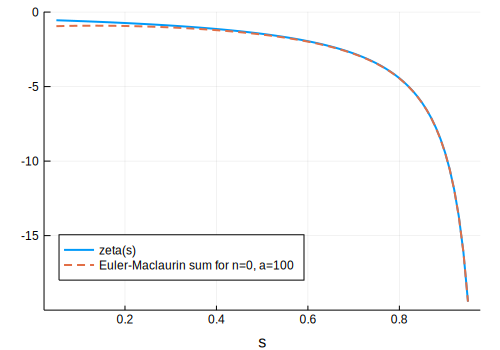

In [16]:
# 上の結果のプロット

ApproxZeta0(a, s) = sum(n->n^(-s), 1:a-1) - a^(1-s)/(1-s)
a = 100
s = 0.05:0.01:0.95
@time z = zeta.(s)
@time w = ApproxZeta0.(a, s)
plot(size=(500, 350), legend=:bottomleft, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for n=0, a=$a", lw=2, ls=:dash)

  0.000188 seconds (29 allocations: 2.406 KiB)
  0.057385 seconds (19.02 k allocations: 1003.415 KiB)


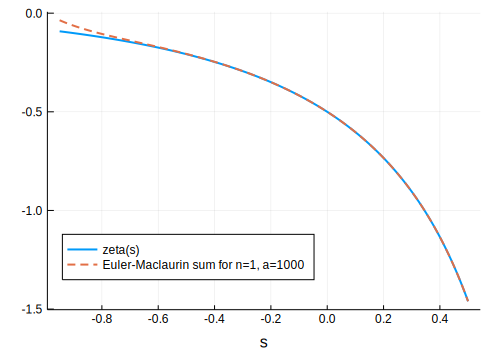

In [17]:
# さらに項の数を1つ増やした場合のプロット

# ζ(s) - R_{1,a} = Σ_{n=1}^{a-1} n^{-s}  - a^{1-s}/(1-s) + 1/(2a^s)
#
ApproxZeta1(a, s) = sum(n->n^(-s), 1:a-1) - a^(1-s)/(1-s) + 1/(2*a^s)

s = -0.95:0.01:0.5
a = 10^3
@time z = zeta.(s)
@time w = ApproxZeta1.(a,s)
plot(size=(500, 350), legend=:bottomleft, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for n=1, a=$a", lw=2, ls=:dash)

13-element Array{Tuple{Int64,Float64,Float64},1}:
 (0, -0.5, -0.5)               
 (-1, -0.0833333, -0.0833333)  
 (-2, -0.0, -1.29543e-77)      
 (-3, 0.00833333, 0.00833333)  
 (-4, -0.0, -3.45447e-77)      
 (-5, -0.00396825, -0.00396825)
 (-6, -0.0, 0.0)               
 (-7, 0.00416667, 0.00416667)  
 (-8, -0.0, 0.0)               
 (-9, -0.00757576, -0.00757576)
 (-10, -0.0, -4.42172e-75)     
 (-11, 0.0210928, 0.0210928)   
 (-12, -0.0, 0.0)              

  0.000093 seconds (29 allocations: 1.625 KiB)
  0.269005 seconds (202.06 k allocations: 9.675 MiB)


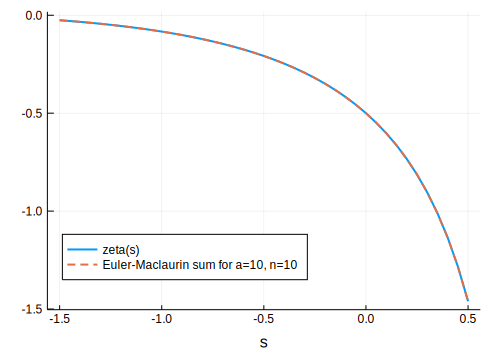

  0.000303 seconds (29 allocations: 3.563 KiB)
  0.068418 seconds (565.80 k allocations: 20.997 MiB, 21.94% gc time)


In [18]:
# さらに一般の場合のプロット
#
# Euler-Maclaurinの和公式で ζ(s) の負の s での値をぴったり近似できていることがわかる.

[(-m, zeta(-m), Float64(ApproxZeta(2, 17, -m))) for m = 0:12] |> display

n = 10
s = -1.5:0.05:0.5
a = 10
@time z = zeta.(s)
@time w = ApproxZeta.(a, n, s)
P1 = plot(size=(500, 350), legend=:bottomleft, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for a=$a, n=$n", lw=2, ls=:dash)

n = 17
s = -16:0.05:-2.0
a = 2
@time z = zeta.(s)
@time w = ApproxZeta.(a, n, s)
P2 = plot(size=(500, 350), legend=:topright, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for a=$a, n=$n", lw=2, ls=:dash)

display(P1)

上と下のグラフを見ればわかるように, Euler-Maclaurinの和公式によって負の実数での $\zeta$ 函数の値を非常によく近似できている. 実は $\zeta(s)$ を実部が負の複素数まで拡張してもこの近似はうまく行っている.

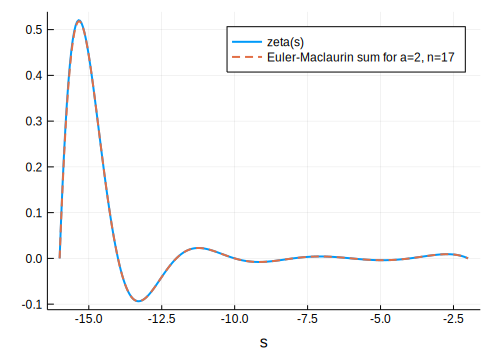

In [19]:
display(P2)

### ζ(2)の近似計算

$\ds\zeta(2)=\sum_{n=1}^\infty \frac{1}{n^2}$ を計算せよという問題は**Basel問題**と呼ばれているらしい. Basel問題はEulerによって1743年ころに解かれたらしい. Eulerがどのように考えたかについては次の文献を参照せよ.

* 杉本敏夫, <a href="http://www.kurims.kyoto-u.ac.jp/~kyodo/kokyuroku/contents/pdf/1583-12.pdf">バーゼル問題とオイラー</a>, 2007年8月23日, 数理解析研究所講究録, 第1583巻, 2008年, pp.159-167

Eulerは $\zeta(2)$ の近似値を自ら開発したEuler-Maclaurinの和公式を使って精密に計算したらしい.

近似式

$$
\zeta(s) \approx
\sum_{n=1}^{a-1} \frac{1}{n^s} - \frac{a^{1-s}}{1-s} + 
\frac{1}{2a^s} - \sum_{k=2}^n \frac{B_k}{k a^{s+k-1}}\binom{-s}{k-1} 
$$

を用いて, $\zeta(2)$ を計算してみよう. 3以上の奇数 $n$ について $B_n=0$ となるので, $n=2m$ のとき, 右辺の項数は $a+m+1$ になる.

例えば, $a=10$, $m=9$ とし, 20項の和を取ると,

$$
\zeta(2) \approx 1.64493\;40668\;4749\cdots
$$

となり, 正確な値 $\ds\frac{\pi^2}{6}=1.64493\;40668\;4822\cdots$ と小数点以下第11桁まで一致している. 

Eulerは後に $\ds\zeta(2)=\frac{\pi^2}{6}$ を得る. Eulerは競争相手に議論に厳密性に欠けるとして様々な批判を受けたのだが, 以上のような数値計算の結果を知っていたので, 正解を得たという確信は微塵も揺らがなかっただろうと思われる.

**注意:** 論理的に厳密な証明の方法が発達した現代においても, 人間は常に証明を間違う可能性がある. 人間が行った証明は絶対的には信用できない. だから, たとえ証明が完成したと思っていたとしても, 可能ならば数値計算によって論理的に厳密な証明以外の証拠を作っていた方が安全だと思われる. $\QED$

**注意:** 数学のノートを作りながら, 気軽に数値的証拠も同時に得るための道具として, 筆者がこのノート作成のために用いている<a href="https://julialang.org/">Julia言語</a>と<a href="http://jupyter.org/">Jupyter</a>と<a href="https://github.com/ipython-contrib/jupyter_contrib_nbextensions">Nbextensions</a>のLive Markdown Previewはこれを書いている時点で相当に優秀な道具であるように思われる. $\QED$

In [20]:
# 20項の和

N = 20
[(m, N-m-1, 2m, ApproxZeta(N-m-1, 2m, 2) - big(π)^2/6) for m in 2:N÷2-1] |> display

m = 9
a = N-m-1
Z = big(π)^2/6
A = ApproxZeta(a, m, 2)
@show a,m
@show Z
@show A;

8-element Array{Tuple{Int64,Int64,Int64,BigFloat},1}:
 (2, 17, 4, -5.77451793863474833797788940478358503699585407578399357681001619323664145261758e-11)  
 (3, 16, 6, 4.808127352395625095013460112150325878389866054958153137408430487774776509324829e-13)  
 (4, 15, 8, -8.630887513943044224615236465465206970650911046136527708026292186723865816966492e-15) 
 (5, 14, 10, 3.116217978527385328054235573023871173466586797186396436897662720414552852297451e-16) 
 (6, 13, 12, -2.200847274100542514575619216657515798396053843860275532661691594239630209744406e-17)
 (7, 12, 14, 3.035248943857815147777677383711316694019656935103319432181355248871820406062584e-18) 
 (8, 11, 16, -8.335321043122531064769674746337938450627967961329547742403411230422546148897753e-19)
 (9, 10, 18, 4.746601814392005312714027578027970306539540935051342164737224161514796063021067e-19) 

(a, m) = (10, 9)
Z = 1.644934066848226436472415166646025189218949901206798437735558229370007470403185
A = 1.644934066847493071302595112118921642731166540690350214159737969261778785588307


###  s = 1でのζ(s)の定数項がEuler定数になること

$\zeta(s)=\ds\sum_{n=1}^\infty \frac{1}{n^s}$ にEuler-Maclaurinの和公式を使って, 2以上の $n$ について次の公式が得られるのであった:

$$
\begin{aligned}
&
\zeta(s) = \frac{1}{s-1} + \frac{1}{2} - 
\sum_{k=2}^n \frac{B_k}{k}\binom{-s}{k-1} + R_n,
\\ &
R_n = (-1)^{n-1}\binom{-s}{n}\int_1^\infty B_n(x-\lfloor x\rfloor)x^{-s-n}\,dx.
\end{aligned}
$$

$n=1$ の場合には

\begin{aligned}
\sum_{j=a}^b f(j) &= 
\int_a^b f(x)\,dx + f(a) + \int_a^b (x-\lfloor x\rfloor)f'(x)\,dx
\\ &=
\int_a^b f(x)\,dx + f(a) + \sum_{j=a}^{b-1}\int_0^1 x f'(x+j)\,dx
\end{aligned}

を $f(x)=x^{-s}$, $f'(x)=-sx^{-s-1}$, $a=1$, $b=\infty$ の場合に適用して,

$$
\zeta(s) = 
\frac{1}{s-1} + 1 - s\sum_{j=1}^\infty\int_0^1 \frac{x}{(x+j)^{s+1}}\,dx
$$

を得る. したがって,

$$
\lim_{s\to 1}\left(\zeta(s)-\frac{1}{s-1}\right) =
1 - \sum_{j=1}^\infty\int_0^1 \frac{x}{(x+j)^2}\,dx.
$$

そして, $x=t-j$ と置換すると, 

$$
\begin{align}
-\int_0^1\frac{x}{(x+j)^2}\,dx &= 
-\int_j^{j+1}\frac{-(t-j)}{t^2}\,dt = 
-\left[\log t + \frac{j}{t}\right]_j^{j+1} 
\\ &=
-\log(j+1)+\log j -\frac{j}{j+1}+1 =
\frac{1}{j+1} + \log j - \log(j+1)
\end{align}
$$

なので, これを $j=1$ から $j=N-1$ まで足し上げることによって,

$$
1 - \sum_{j=1}^{n-1}\int_0^1\frac{x}{(x+j)^2}\,dx =
\sum_{j=1}^N\frac{1}{j} - \log N.
$$

これの $N\to\infty$ での極限はEuler定数 $\gamma=0.5772\cdots$ の定義であった. 以上によって次が示された:

$$
\lim_{s\to 1}\left(\zeta(s)-\frac{1}{s-1}\right) = \gamma = 0.5772\cdots.
$$

### 負の整数におけるゼータ函数の特殊値の計算

Euler-Maclaurinの和公式: $3$ 以上の整数 $k$ について $B_k=0$ なので, 以下の公式で $k$ は偶数のみを動くとしてよい:

$$
\begin{aligned}
&
\sum_{n=a}^b f(n) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^m \frac{B_k}{k!}(f^{(k-1)}(b) - f^{(k-1)}(a)) + R_m,
\\ &
R_n = (-1)^{m-1}\int_a^b \frac{\tilde{B}_m(x)}{m!} f^{(m)}(x)\,dx.
\end{aligned}
$$

ここで $\tilde{B}_m(x)=B_m(x-\lfloor x\rfloor)$ とおいた.

Euler-Maclaurinの和公式を $f(x)=n^{-s}$, $a=1$, $b=\infty$ の場合に適用することによって $\zeta(s)$ は次の形で $\Re s > 1-m$ まで自然に延長(解析接続)されるのであった:

$$
\zeta(s) = 
\frac{1}{s-1} + \frac{1}{2} -
\frac{1}{1-s}\sum_{k=2}^m \binom{1-s}{k} B_k + 
(-1)^{m-1}\int_a^b \binom{-s}{m} \tilde{B}_m(x) x^{-s-m}\,dx.
$$

この公式と $k\geqq 2$ のとき $\ds\binom{1}{k}=0$ となることより, 

$$
\zeta(0) = \frac{1}{0-1} + \frac{1}{2} = -\frac{1}{2}.
$$

$r$ は正の整数であるとする. このとき, $m>r$ とすると $\ds\binom{r}{m}=0$ となるので, $B_0=1$, $B_1=-1/2$ なので,

$$
\begin{aligned}
\zeta(-r) &=
-\frac{1}{r+1} + \frac{1}{2} -
\frac{1}{r+1}\sum_{k=2}^{r+1} \binom{m+1}{k} B_k
\\ =&
-\frac{1}{r+1}\sum_{k=0}^{r+1} \binom{m+1}{k} B_k =
-\frac{B_{r+1}}{r+1}.
\end{aligned}
$$

最後の等号で, Bernoulli数を帰納的に計算するために使える公式 $\ds\sum_{k=0}^r \binom{r+1}{k}B_k=0$ を用いた. 例えば, $r=1$ のとき $B_0+2B_1=1+2(-1/2)=0$ となり, $r=2$ のとき, $B_0+3B_1+3B_2=1+3(-1/2)+3(1/6)=0$ となる.

以上によって次が証明された:

$$
\zeta(0)=-\frac{1}{2}, \quad
\zeta(-r) = -\frac{B_{r+1}}{r+1} \quad (r=1,2,3,\ldots).
$$

これらの公式は $B_n(1)=B_n+\delta_{n,1}$, $B_1=-1/2$ を使うと, 

$$
\zeta(-r) = -\frac{B_{r+1}(1)}{r+1} \quad (r=0,1,2,\ldots)
$$

の形にまとめられる.

### 発散級数の有限部分と ζ(-r) の関係

前節の結果 $\ds\zeta(-r)=-\frac{B_{r+1}(1)}{r+1}$ ($r=0,1,2,\ldots$) は

$$
\begin{aligned}
&
1+1+1+1+\cdots = -\frac{1}{2},
\\ &
1+2+3+4+\cdots = -\frac{1}{12}
\end{aligned}
$$

のような印象的な形式で書かれることもある. ただし, その場合には左辺が通常の無限和ではなく, ゼータ函数 $\zeta(s)$ の解析接続の意味であることを了解しておかなければいけない. 

実はさらに解析接続として理解するだけではなく, 「左辺の発散する無限和から適切に無限大を引き去れば右辺に等しくなる」というようなタイプの命題をうまく作ることもできる. 以下ではそのことを解説しよう.

以下, $\eta$ は非負の実数に値を持つ $\R$ 上の**急減少函数**であると仮定する. ($\R$ 上の急減少函数とは $\R$ 上の $C^\infty$ 函数でそれ自身およびそのすべての階数の導函数に任意の多項式函数をかけたものが $|x|\to\infty$ で $0$ に収束するもののことである.) さらに, 

$$
\eta(0)=1, \quad \eta'(0)=0
$$

と仮定する. 例えば $\eta(x)=e^{-x^2}$ はそのような函数の例になっている.

このとき, $\eta(x)$ が急減少函数であることより, $N>0$ のとき, 級数

$$
\sum_{n=1}^\infty n^r \eta(n/N) = 1^r\eta(1/N) + 2^r\eta(2/N) + 3^r\eta(3/N) + \cdots
$$

は常に絶対収束する. $r$ が非負の整数のとき, $N\to\infty$ とすると, この級数は発散級数 $1^r+2^r+3^r+\cdots$ になってしまう.  以下の目標は, Euler-Maclaurinの和公式を使うと, その $N\to\infty$ での発散部分が $CN^{r+1}$ ($C$ は $\eta$ と $r$ で具体的に決まる定数) の形にまとまることを示すことである. そして, 残った有限部分は**常に** $\zeta(-r)$ に収束することも示される.

$\tilde{B}_n(x)=B_n(x-\lfloor x\rfloor)$ と書くことにする.

このとき, $f(x)=\eta(x/N)$ にEuler-Maclaurinの和公式を適用すると, $f(0)=1$, $f'(0)=f(\infty)=f'(\infty)=0$ より, 
$$
\begin{aligned}
1+\sum_{n=1}^\infty\eta(x/N) &= 
\sum_{n=0}^\infty\eta(x/N) 
\\ &= 
\int_0^\infty\eta(x/N)\,dx + \frac{1}{2} +B_2(f'(\infty)-f'(0)) - 
\int_0^\infty\frac{\tilde{B}_2(x)}{2!}\frac{1}{N^2}\eta''(x/N)\,dx
\\ &=
N\int_0^\infty\eta(y)\,dy + \frac{1}{2} -
\frac{1}{N}\int_0^\infty\frac{\tilde{B}_2(Ny)}{2!}\eta''(y)\,dy.
\end{aligned}
$$

ゆえに, $\zeta(0)=-1/2$ を使うと,

$$
\sum_{n=1}^\infty\eta(x/N) - N\int_0^\infty\eta(y)\,dy =
\zeta(0) + O(1/N).
$$

これは $N\to\infty$ で発散級数 $1+1+1+1+\cdots$ になる無限和 $\ds \sum_{n=1}^\infty\eta(x/N)$ から, その発散部分 $\ds N\int_0^\infty\eta(y)\,dy$ を引き去って, $N\to\infty$ の極限を取ると, $\zeta(0)$ に収束することを意味している. これが欲しい結果の1つ目である.

$r$ は正の整数であるとし, $f(x)=x^r\eta(x/N)$ とおく. そのとき, Leibnitz則

$$
(\varphi(x) \psi(x))^{(m)} = \sum_{i=0}^r \binom{m}{i}\varphi^{(i)}(x)\psi^{(m-i)}(x)
\\
$$

を使うと,

$$
f^{(r+2)}(x) = \frac{1}{N^2}F(x/N), \quad
F(y) = \binom{r+2}{0}y^r\eta^{(r+2)}(y) + \cdots + \binom{r+2}{r}r!\eta(y)
$$

その $f(x)$ にEuler-Maclaurinの和公式を適用すると, $f^{(k)}(\infty)=f^{(k)}(\infty)=0$ および,

$$
f(0) = f'(0) = \cdots = f^{(r-1)}(0) = f^{(r+1)}(0) = 0, \quad
f^{(r)}(0) = r!
$$

より, 

$$
\begin{aligned}
\sum_{n=1}^\infty n^r\eta(n/N) &=
\sum_{n=0}^\infty f(n) =
\int_0^\infty f(x)\,dx - \frac{B_{r+1}}{(r+1)!}r! - \frac{B_{r+2}}{(r+2)!}0 + 
(-1)^{r+1}\int_a^b \frac{\tilde{B}_{r+2}(x)}{(r+2)!} f^{(r+2)}(x)\,dx
\\ &=
N^{r+1}\int_0^\infty y^r\eta(y)\,dy - \frac{B_{r+1}}{r+1} +
(-1)^{r+1}\frac{1}{N}\int_a^b \frac{\tilde{B}_{r+2}(Ny)}{(r+2)!} F(y)\,dy
\\ &=
N^{r+1}\int_0^\infty y^r\eta(y)\,dy - \frac{B_{r+1}}{r+1} + O(1/N).
\end{aligned}
$$

ゆえに, $\ds\zeta(-r)=-\frac{B_{r+1}}{r+1}$ を使うと,

$$
\sum_{n=1}^\infty n^r\eta(n/N) - N^{r+1}\int_0^\infty y^r\eta(y)\,dy =
\zeta(-r) + O(1/N).
$$

これは $N\to\infty$ で発散級数 $1^r+2^r+3^r+4^r+\cdots$ になる無限和 $\ds \sum_{n=1}^\infty n^r\eta(x/N)$ から, その発散部分 $\ds N^{r+1}\int_0^\infty y^r\eta(y)\,dy$ を引き去って, $N\to\infty$ の極限を取ると, $\zeta(-r)$ に収束することを意味している. これが欲しい結果である.

**注意:** 以上の計算のポイントは, 非負の急減少函数 $\eta(x)$ で $\eta(0)=1$, $\eta'(0)=0$ を満たすもので発散級数を正則化して得られる級数の場合には, Euler-Maclaurinの和公式の「途中の項」がほとんど消えてしまうことである. $C N^{r+1}$ 型の発散項と定数項と $O(1/N)$ の部分の3つの項しか生き残らない. $\QED$

**注意:** 以上の結果に関するより進んだ解説については次のリンク先を参照せよ:

* Terence Tao, <a href="https://terrytao.wordpress.com/2010/04/10/the-euler-maclaurin-formula-bernoulli-numbers-the-zeta-function-and-real-variable-analytic-continuation/">The Euler-Maclaurin formula, Bernoulli numbers, the zeta function, and real-variable analytic continuation</a>, Blog: What's new, 10 April, 2010.

このブログ記事はかなり読み易い. $\QED$

**問題:** 以上の結果を数値計算でも確認してみよ. $\QED$

**ヒント:** $\eta(x)=e^{-x^2}$ の場合を試してみよ. そのとき,

$$
\int_0^\infty y^r\eta(y)\,dy = 
\int_0^\infty y^r e^{-y^2}\,dy = 
\frac{1}{2}\Gamma\left(\frac{r+1}{2}\right)
$$

となっている. $\QED$

**解答例:** 次のリンク先のノートを見よ.

* 黒木玄, <a href="http://nbviewer.jupyter.org/gist/genkuroki/8b13fc9c05bfd669c345b940066b896b">ζ(s) の Re s ＜ 1 での様子</a> $\QED$

In [21]:
y = symbols("y", real=true)
r = symbols("r", positive=true)
integrate(y^r*exp(-y^2), (y, 0, oo))

     /r   1\
gamma|- + -|
     \2   2/
------------
     2      